<a href="https://colab.research.google.com/github/fengfrankgthb/Demonstrations/blob/main/LIT_CeO2_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Showing text embeddings 2025.05.18

## 1. Install Necessary Libraries
* **sentence-transformers** This is the text embedding library
* **scikit-learn** This is the machine learning library
* **matplotlib** This is the mat-lab style plotting library

In [1]:
!pip install sentence-transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## 2. import necessary modules from the libraries

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# set matplot to inline (static) mode (or notebook for interactive mode)
# even though default is inline mode, be explicit to avoid any confusion
%matplotlib inline

## 3. Imput text data

Used *118HHH Q1 on CeO2-NPs* for illustration, breaking into 9 components:

* Pa = All Sentences combined in Prompt
* P1 = 1st sentence in Prompt
* P2 = 2nd sentence in Prompt
* P3 = 3rd sentence in Prompt
* Q? = the Question sentence
* Ax = wrong choice A
* Bv = correct answer B
* Cx = wrong choice C
* Dx = wrong choice D

In [3]:
sentences = [
    "Pa:  Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water. In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha). While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "P1: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water.",
    "P2: In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha).",
    "P3: While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "Q?: Which finding, if true, would most directly weaken the hypothesis presented in the text?",
    "Ax) When D. polymorpha and O. mykiss are exposed to similar levels of CeO2-NPs, concentrations of CeO2-NPs in animals of both species show little variation from individual to individual.",
    "Bv) The rate of CeO2-NPs uptake in D. polymorpha differs from the rate of CeO2-NPs uptake in O. mykiss in a way that is not yet well understood by researchers.",
    "Cx) D.polymorpha has been shown to accumulate several other types of manufactured nanoparticles in addition to CeO2-NPs, whereas O. mykiss has been shown to accumulate only CeO2-NPs.",
    "Dx) Compared with O. mykiss, D.polymorpha can accumulate detectable CeO2-NPs concentrations with significantly fewer negative effects."
]

## 4. Generate Embedding on sentences.

Used a pre-trained Sentence Transformer model, `all-mpnet-base-v2`, to generate embeddings for each sentence. This model is a good general-purpose choice, with mapping of sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [4]:
# Load the pre-trained model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate the embeddings
embeddings = model.encode(sentences)

print("Shape of embeddings:", embeddings.shape)
print("Example embedding (first sentence):\n", embeddings[0][:20]) # Print the first 20 dimensions

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Shape of embeddings: (9, 768)
Example embedding (first sentence):
 [ 0.01311721  0.04682481 -0.01610916 -0.06537693 -0.0207592   0.00368772
  0.01451678  0.01507424  0.01200456 -0.02659478 -0.02420882  0.05405664
  0.01482707  0.0146602   0.02766617  0.01475706  0.04501006 -0.00233948
  0.03254052  0.00490344]


## 5. Reduce dimensionality into 2D with PCA

**PCA** = principal component analysis.

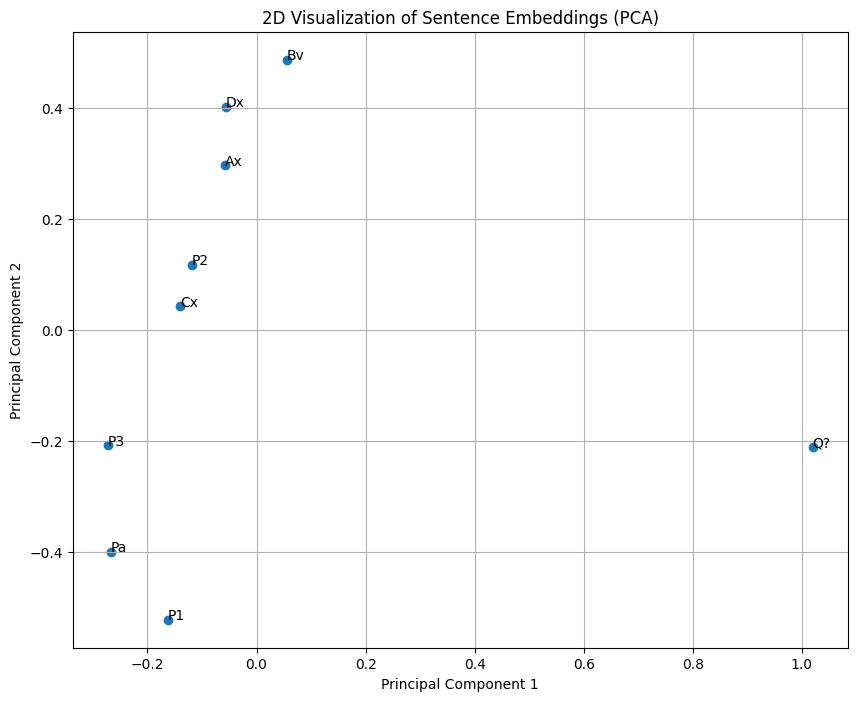

In [7]:
# Reduce to 2 dimensions using PCA
pca_2d = PCA(n_components=2)
reduced_embeddings_2d = pca_2d.fit_transform(embeddings)

# Visualize the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings_2d[:, 0], reduced_embeddings_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_2d[i, 0], reduced_embeddings_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## 6. Reduce Dimensionality to 3D using PCA

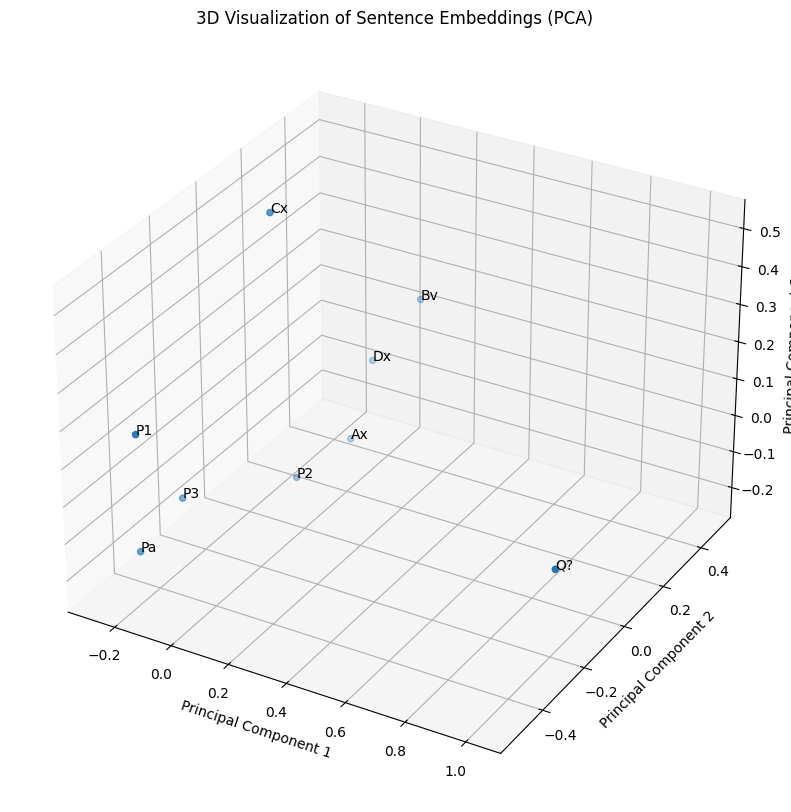

In [10]:
# Reduce to 3 dimensions using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(12, 10))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_3d[i, 0], reduced_embeddings_3d[i, 1], reduced_embeddings_3d[i, 2], txt[:2])

ax_3d.set_xlabel("Principal Component 1")
ax_3d.set_ylabel("Principal Component 2")
ax_3d.set_zlabel("Principal Component 3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (PCA)")
plt.show()

## 7. Using t-SNE for Dimensionality Reduction

**t-SNE** = t-distributed stochastic neighbor embedding. Unlike PCA, it demonstrate the embedding in non-linear relationships.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


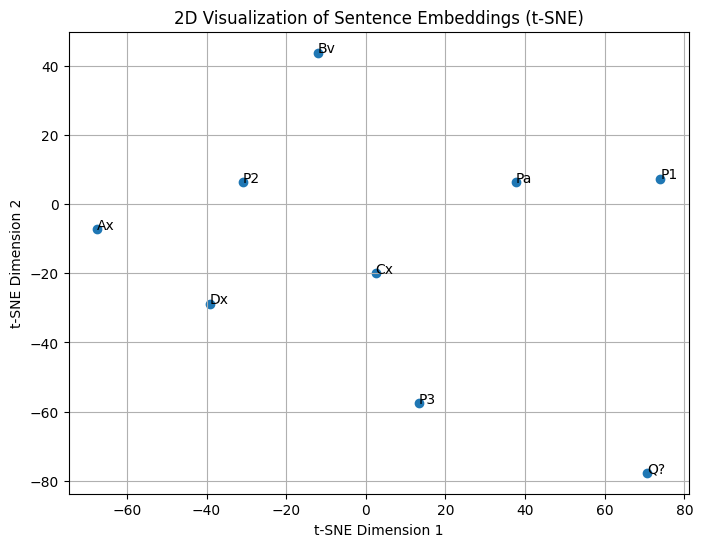

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2 dimensions using t-SNE with a lower perplexity
tsne_2d = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1)) # Set perplexity <= 5 or n_samples - 1
reduced_embeddings_tsne_2d = tsne_2d.fit_transform(embeddings)

# Visualize the 2D embeddings (t-SNE)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_tsne_2d[:, 0], reduced_embeddings_tsne_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_tsne_2d[i, 0], reduced_embeddings_tsne_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


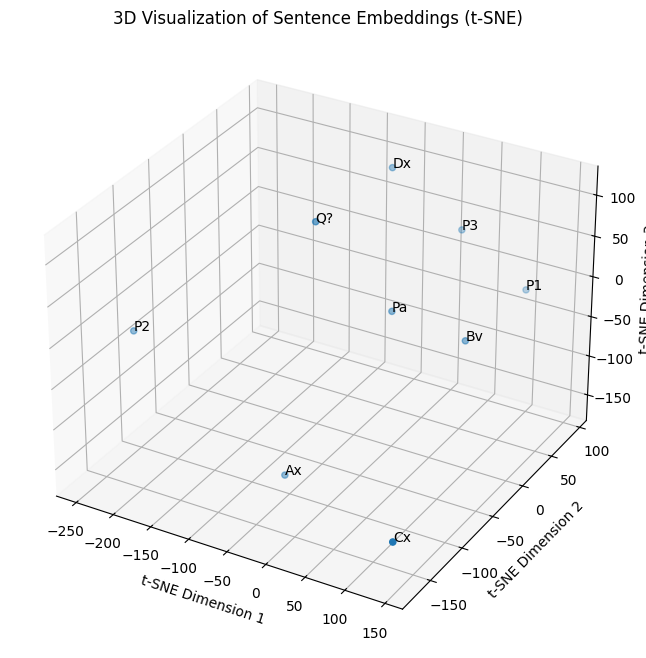

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 dimensions using t-SNE with a lower perplexity
tsne_3d = TSNE(n_components=3, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1))
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_tsne_3d[:, 0], reduced_embeddings_tsne_3d[:, 1], reduced_embeddings_tsne_3d[:, 2])

# Annotate each point with the first letter of the sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_tsne_3d[i, 0], reduced_embeddings_tsne_3d[i, 1], reduced_embeddings_tsne_3d[i, 2], txt[:2])

ax_3d.set_xlabel("t-SNE Dimension 1")
ax_3d.set_ylabel("t-SNE Dimension 2")
ax_3d.set_zlabel("t-SNE Dimension 3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (t-SNE)")
plt.show()

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [1, 2, 3]
y = [1, 2, 3]
z = [1, 2, 3]

ax.scatter(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Simple 3D Scatter')
plt.show()

<IPython.core.display.Javascript object>